# Unsupervised Learning - Data Clustering
#### Edmar Junyor Bevilaqua

### Gaussian Mixture Models - Demo 1

* Use of the GMM algorithm with different parameters.
* Synthetic dataset

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.colors
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs

%matplotlib inline

sns.set(style='darkgrid', context='talk', rc={'figure.figsize': (14, 8)})

### Creating Synthetic dataset

In [2]:
X, y = make_blobs(n_samples=1000, centers=7, n_features=2,
                  random_state=33)

df = pd.DataFrame(X, columns=['x', 'y'])
df['label'] = y

df.head()

x         y  label
0   7.415416 -5.293543      2
1  -3.898435 -0.410129      0
2  -6.065070 -0.514075      0
3  -7.980452  8.115292      3
4  10.479860 -0.900095      5

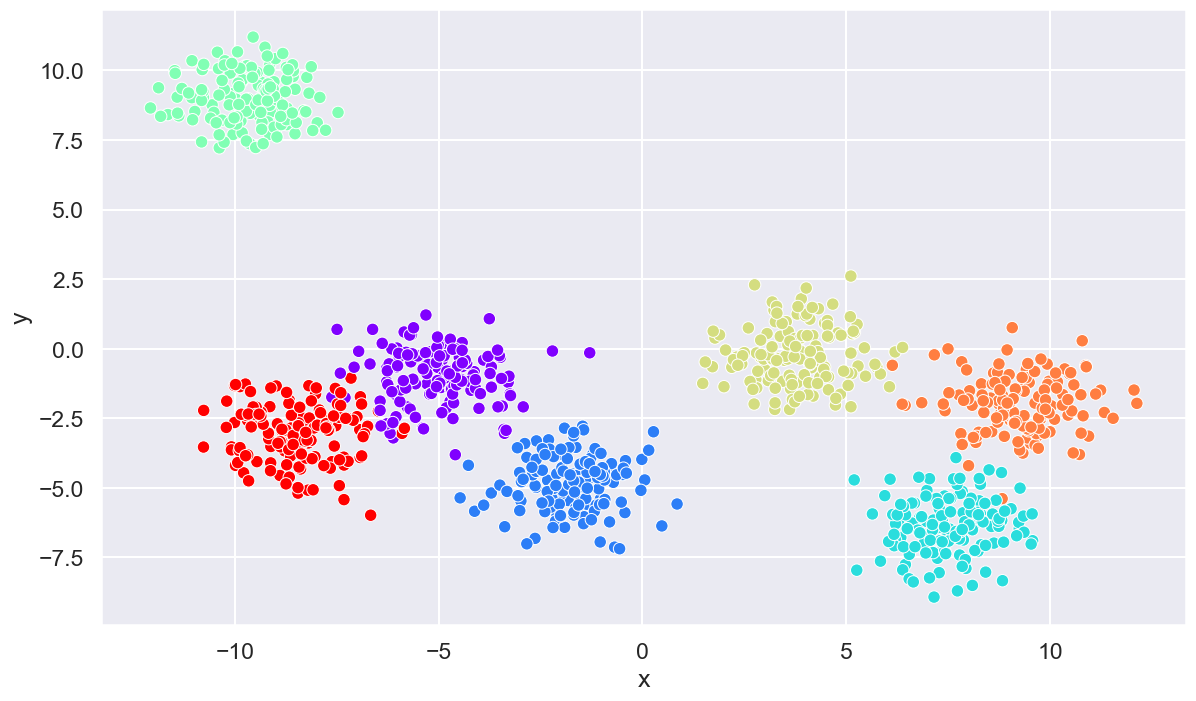

In [4]:
_ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='rainbow', legend=False)

### Creating function to Test GMM

In [6]:
def train_and_plot(data, k=3, covariance_type='full', tol=0.001, 
                   max_iter=100, n_init=1, init_params='kmeans', random_state=133):
    
    # Copying the data and removing the label column 
    data_copy = data.copy()
    data_copy.drop(columns='label', inplace=True)
    
    model = GaussianMixture(n_components=k, covariance_type=covariance_type, tol=tol,
                            max_iter=max_iter, n_init=n_init, init_params=init_params, random_state=random_state)
    model.fit(data_copy)
    
    data_copy['cluster_labels'] = model.predict(data_copy)
    _ = sns.scatterplot(x='x', y='y', data=data_copy, hue='cluster_labels', palette='rainbow', legend=False)

    means = model.means_
    means_x = means[:,0]
    means_y = means[:,1]

    _ = plt.scatter(means_x, means_y, color='black', s=100)
    
    w_factor = 0.2 / model.weights_.max()
    
    if covariance_type == 'tied':
        covars = np.repeat(model.covariances_, k, axis=0)
    else:
        covars = model.covariances_
        
    for pos, covar, w in zip(model.means_, covars, model.weights_):
        draw_ellipse(pos, covar, covariance_type, alpha=w * w_factor)
    
    return model

def draw_ellipse(position, covariance, covariance_type, ax=None, **kwargs):
    """
    Draw an ellipse with a given position and covariance
    
    Method adapted from: https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
    """
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    elif covariance_type == 'spherical':
        angle = 0
        width = 2 * np.sqrt(covariance)
        height = width
    else:
        angle = 0
        width, height = 2 * np.sqrt(np.abs(covariance))
    
    # Draw the Ellipse
    ax.axis('equal')
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))


### Initialization
Differences when initializing randomly or using K-means. Note the difference in the clustering result.

C:\Users\edmar\AppData\Local\Temp\ipykernel_7532\3638032163.py:57: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


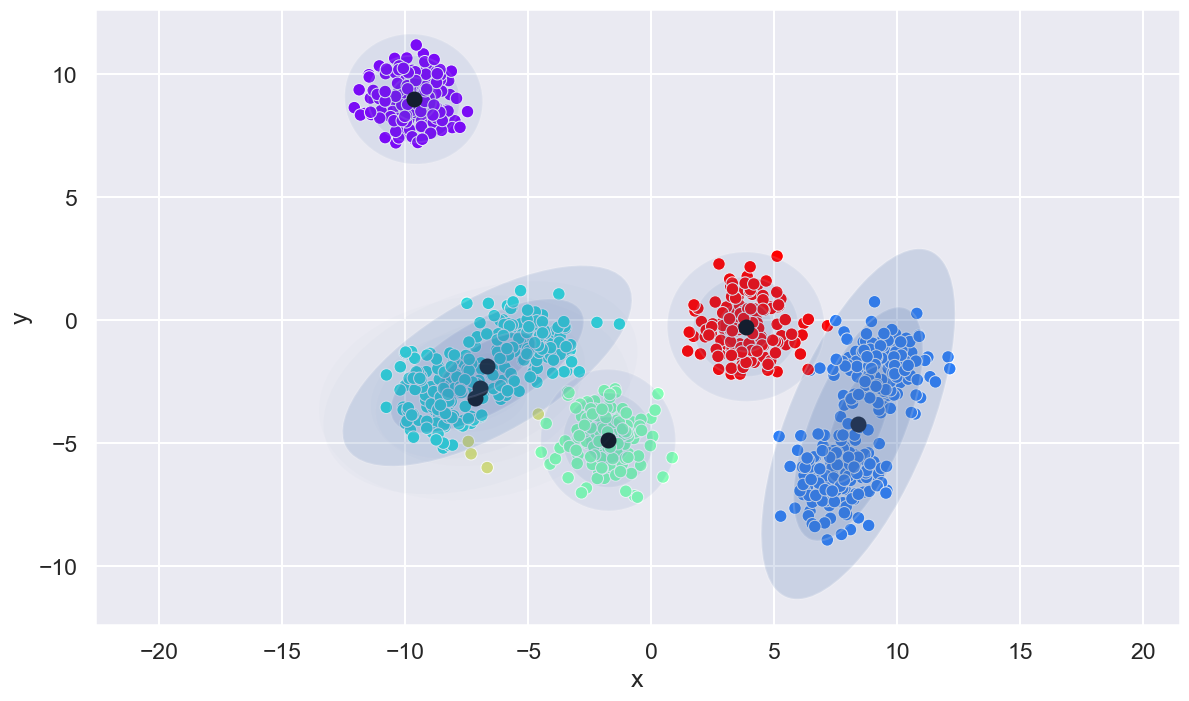

In [7]:
gmm = train_and_plot(df, k=7, random_state=4000, init_params='random')

C:\Users\edmar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\edmar\AppData\Local\Temp\ipykernel_7532\3638032163.py:57: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


GaussianMixture(n_components=7, random_state=4000)

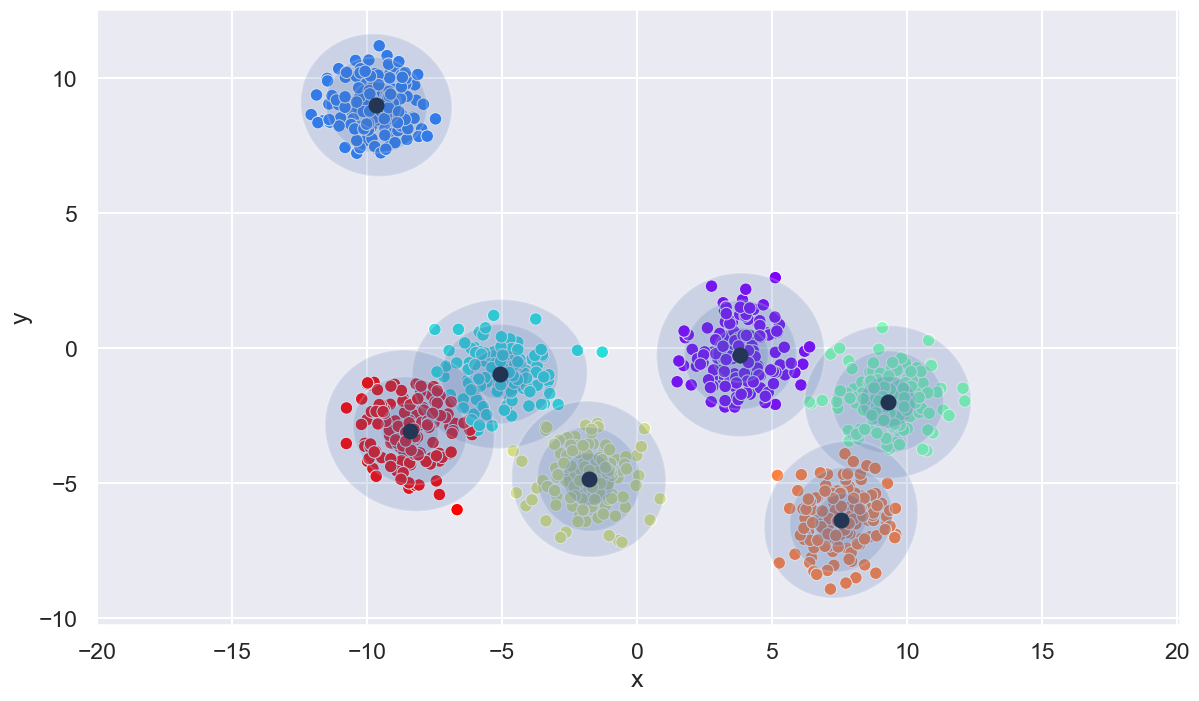

In [8]:
train_and_plot(df, k=7, random_state=4000, init_params='kmeans')

### Initialization
Execution differences with different `random_state`. Note the difference in the clustering result.

C:\Users\edmar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\edmar\AppData\Local\Temp\ipykernel_7532\3638032163.py:57: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


GaussianMixture(n_components=7, random_state=4000)

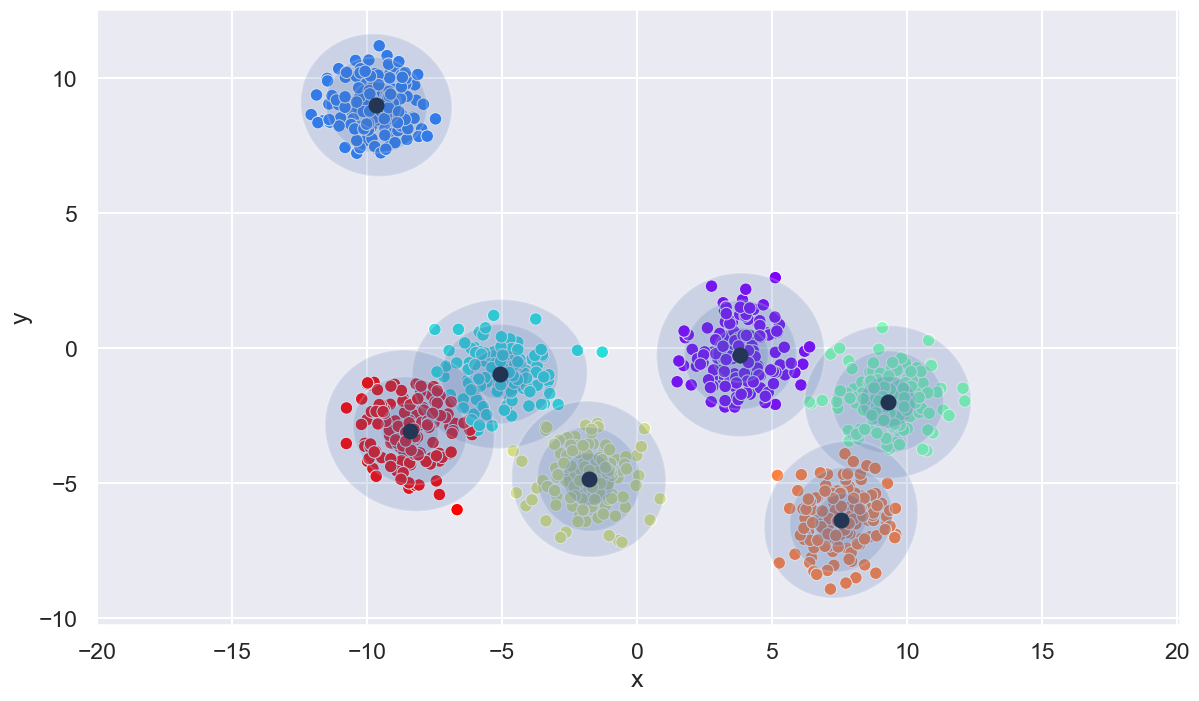

In [9]:
train_and_plot(df, k=7, random_state=4000)

C:\Users\edmar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\edmar\AppData\Local\Temp\ipykernel_7532\3638032163.py:57: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


GaussianMixture(n_components=7, random_state=100)

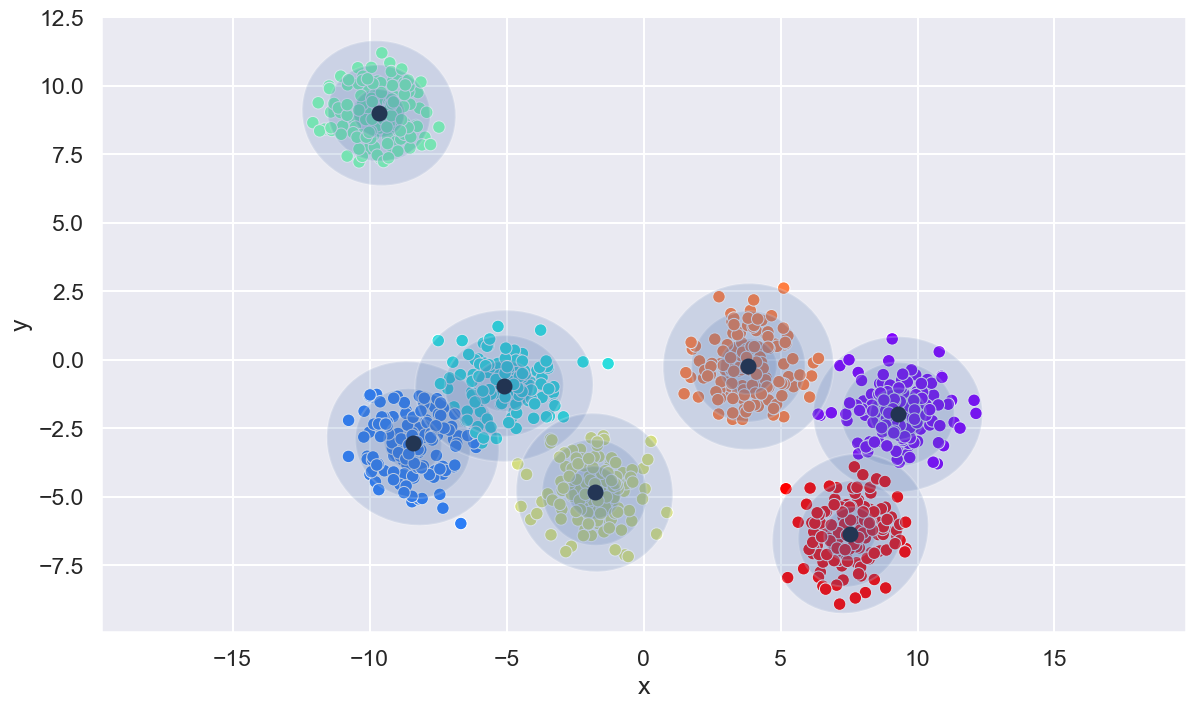

In [10]:
train_and_plot(df, k=7, random_state=100)

### Number of clusters
Differences in execution with different numbers of clusters.

C:\Users\edmar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\edmar\AppData\Local\Temp\ipykernel_7532\3638032163.py:57: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


GaussianMixture(n_components=3, random_state=133)

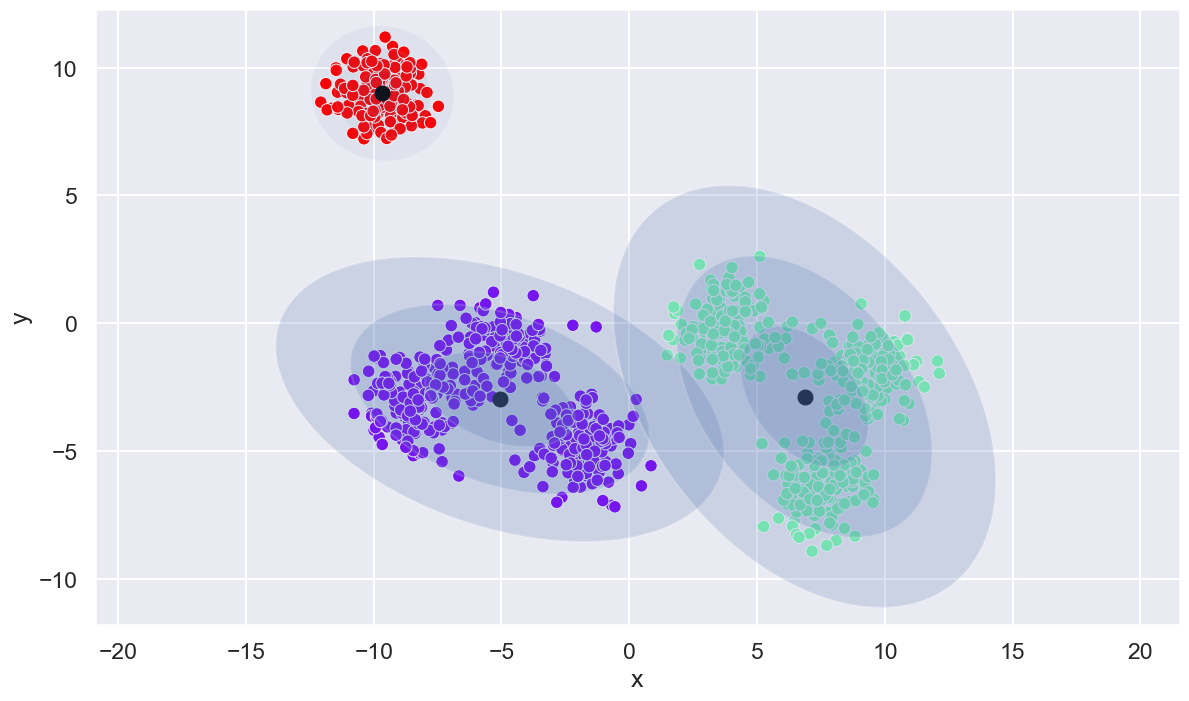

In [11]:
train_and_plot(df, k=3)

C:\Users\edmar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\edmar\AppData\Local\Temp\ipykernel_7532\3638032163.py:57: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


GaussianMixture(n_components=4, random_state=133)

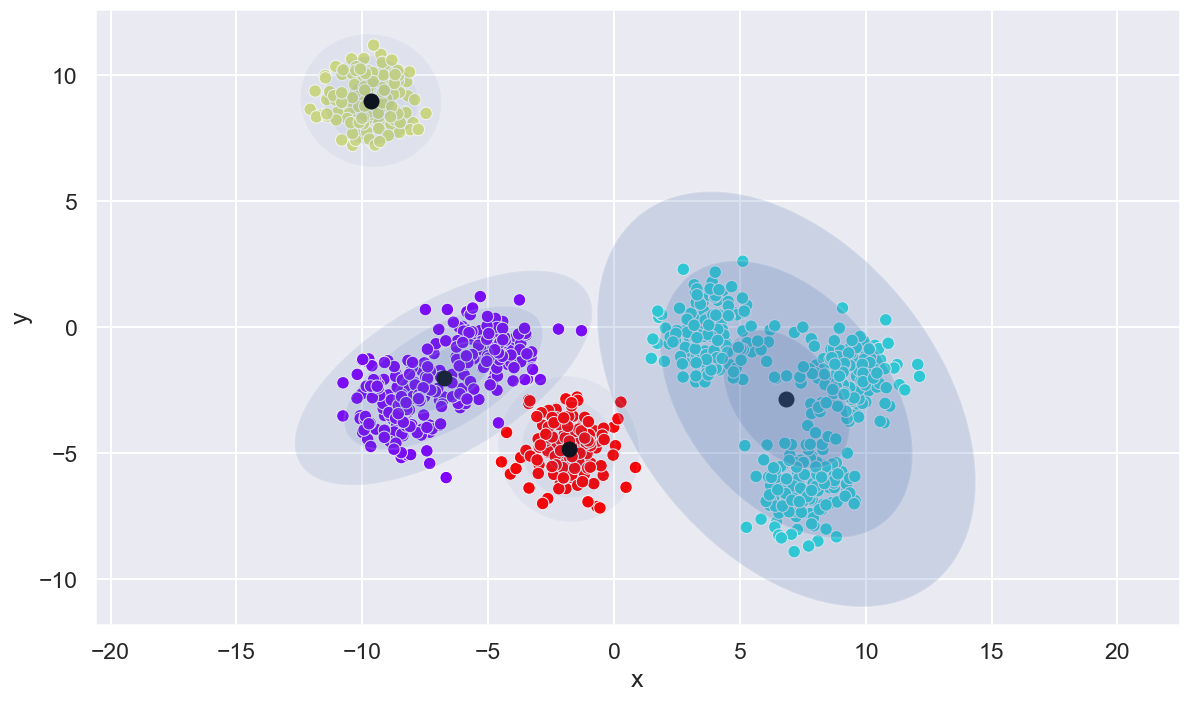

In [12]:
train_and_plot(df, k=4)

C:\Users\edmar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\edmar\AppData\Local\Temp\ipykernel_7532\3638032163.py:57: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


GaussianMixture(n_components=5, random_state=133)

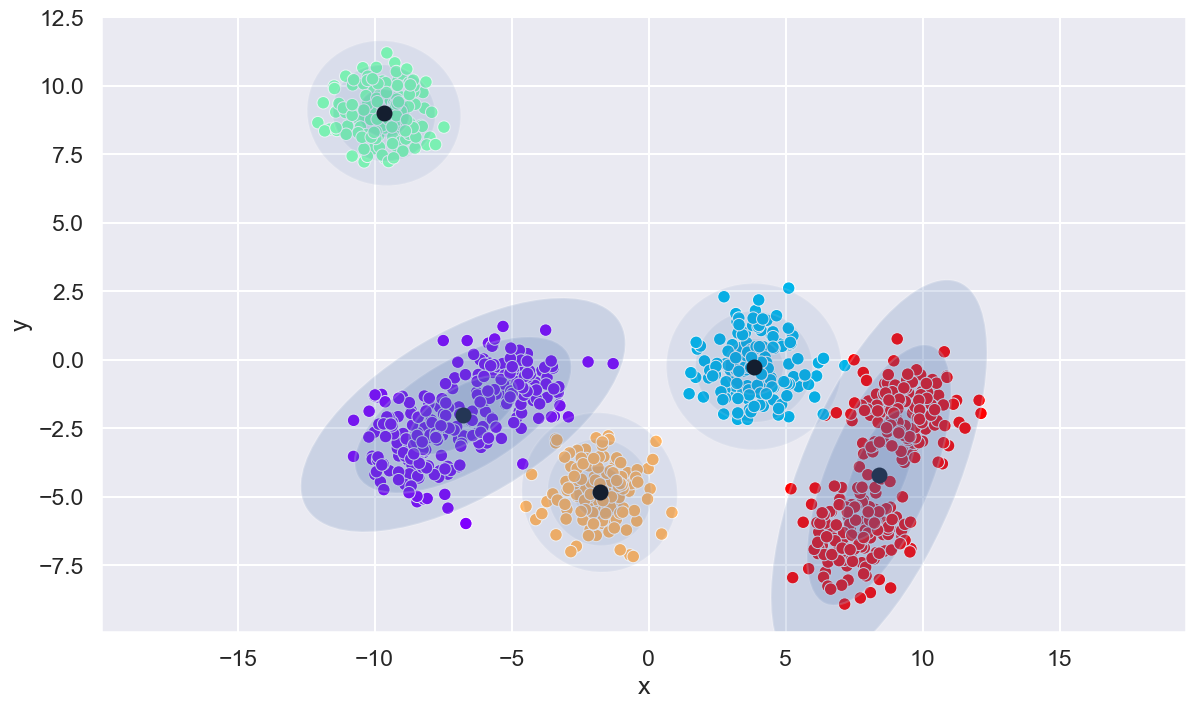

In [13]:
train_and_plot(df, k=5)

C:\Users\edmar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\edmar\AppData\Local\Temp\ipykernel_7532\3638032163.py:57: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


GaussianMixture(n_components=6, random_state=133)

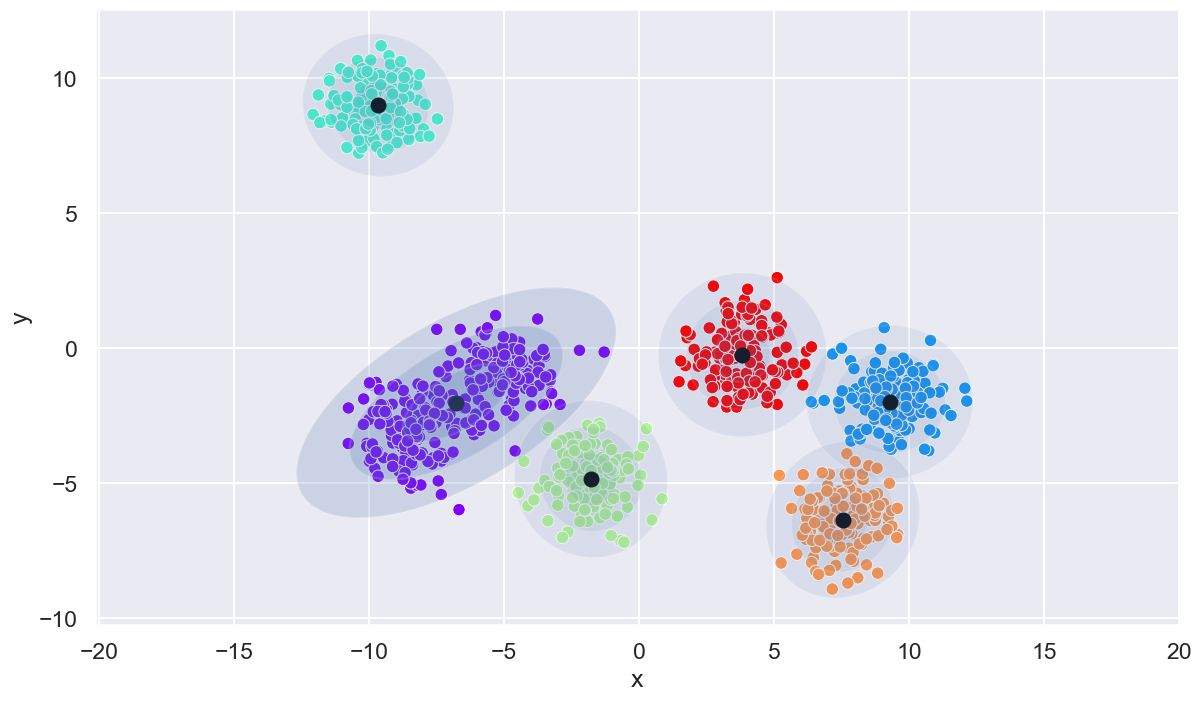

In [14]:
train_and_plot(df, k=6)

C:\Users\edmar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\edmar\AppData\Local\Temp\ipykernel_7532\3638032163.py:57: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


GaussianMixture(n_components=10, random_state=133)

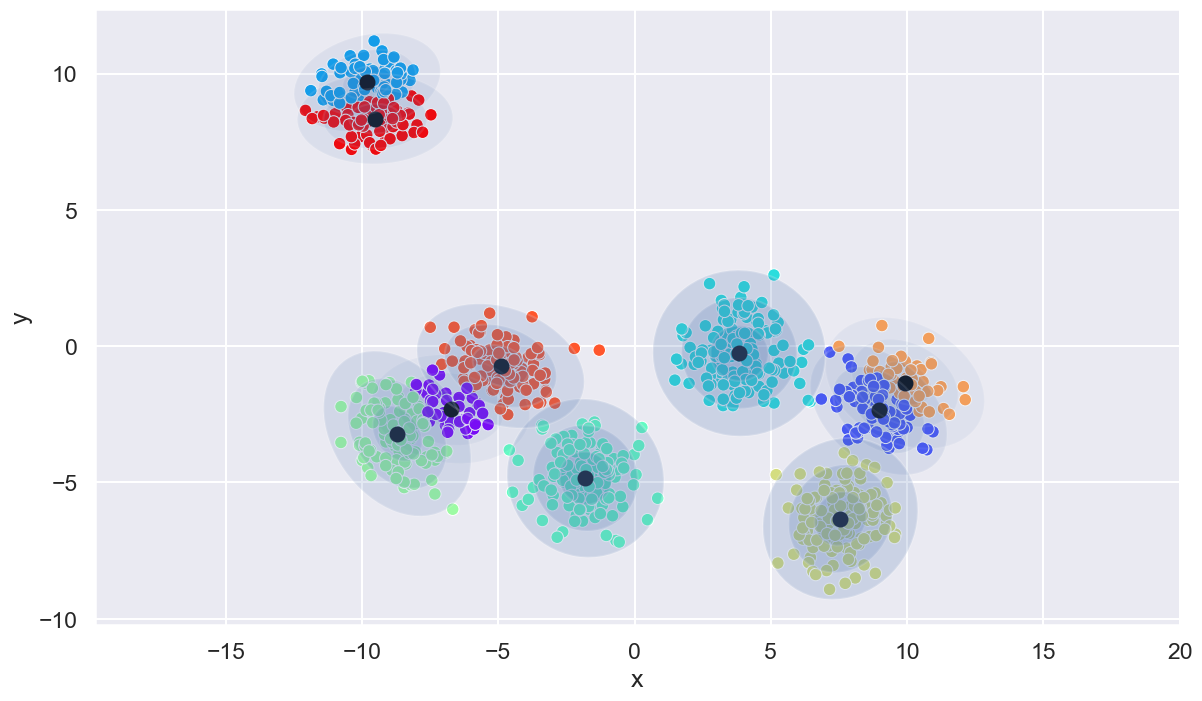

In [15]:
train_and_plot(df, k=10)

### Moon-shaped clusters

In [16]:
X, y = make_moons(300, noise=.05, random_state=33)

df_moon = pd.DataFrame(X, columns=['x', 'y'])
df_moon['label'] = y

df_moon.head()

x         y  label
0  0.449533 -0.403077      1
1  1.860595  0.011092      1
2  1.842407 -0.086292      1
3  1.395956 -0.438878      1
4  0.479125  0.926415      0

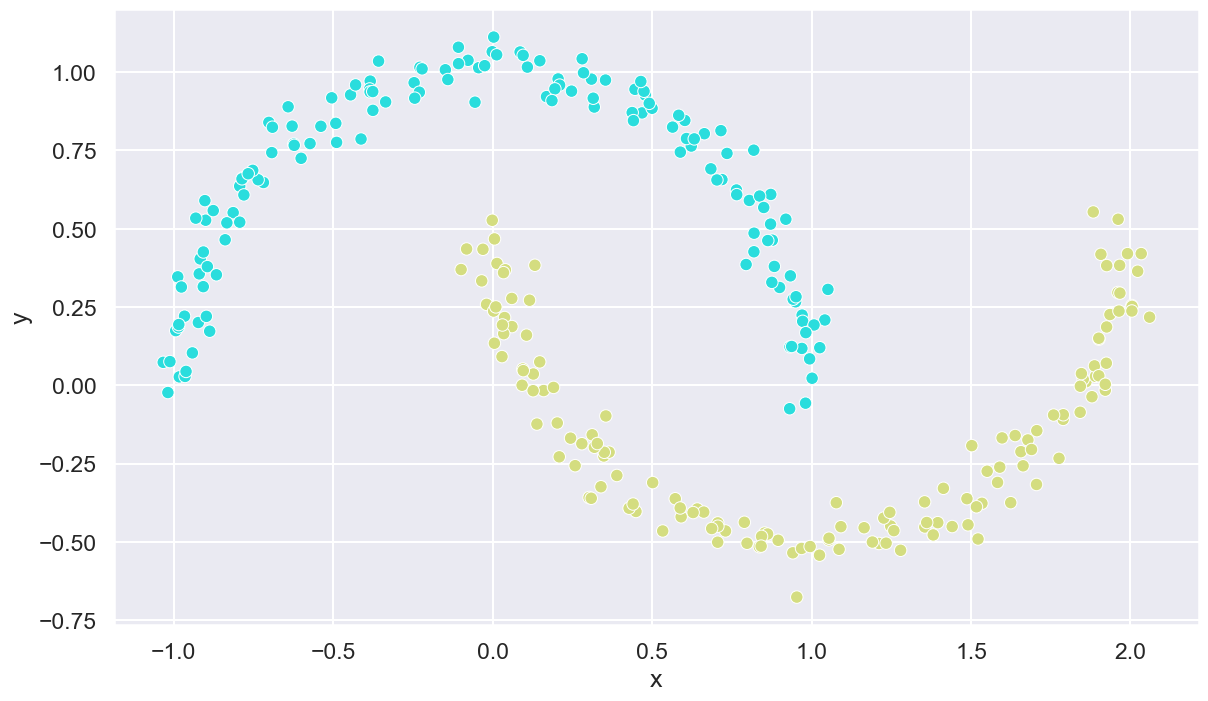

In [17]:
_ = sns.scatterplot(x='x', y='y', data=df_moon, hue='label', palette='rainbow', legend=False)

C:\Users\edmar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\edmar\AppData\Local\Temp\ipykernel_7532\3638032163.py:57: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


GaussianMixture(n_components=2, random_state=133)

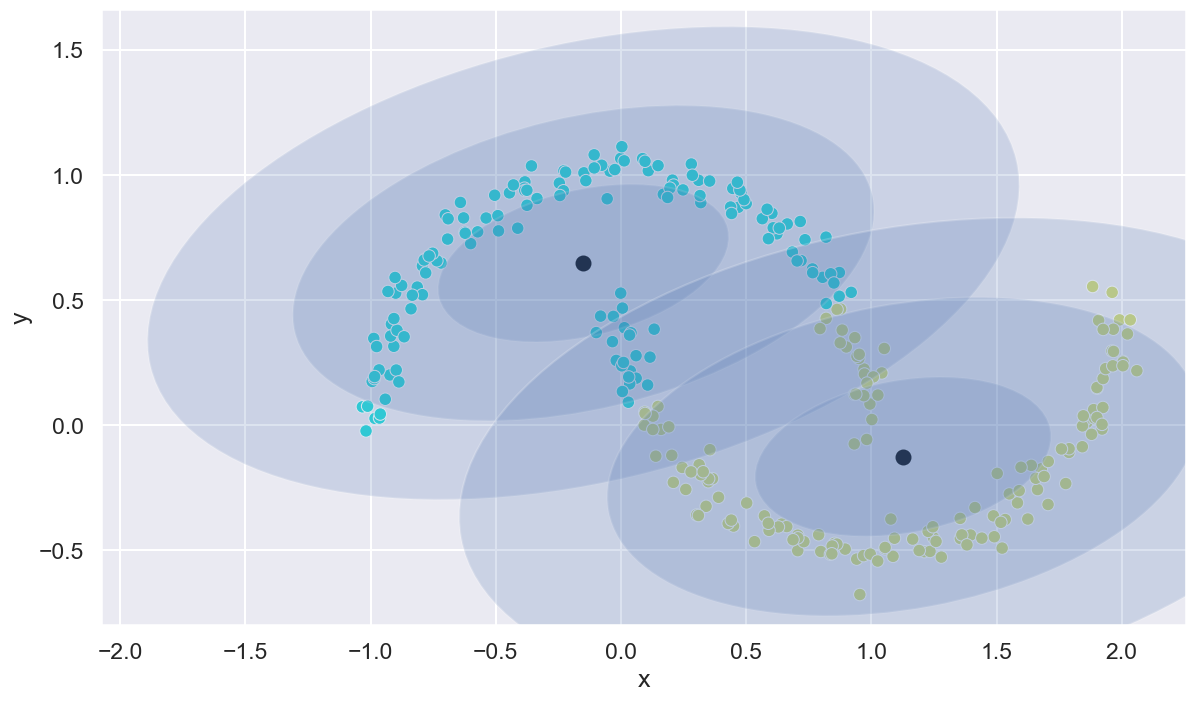

In [18]:
train_and_plot(df_moon, k=2)

C:\Users\edmar\AppData\Local\Temp\ipykernel_7532\3638032163.py:57: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


GaussianMixture(init_params='random', n_components=2, random_state=42)

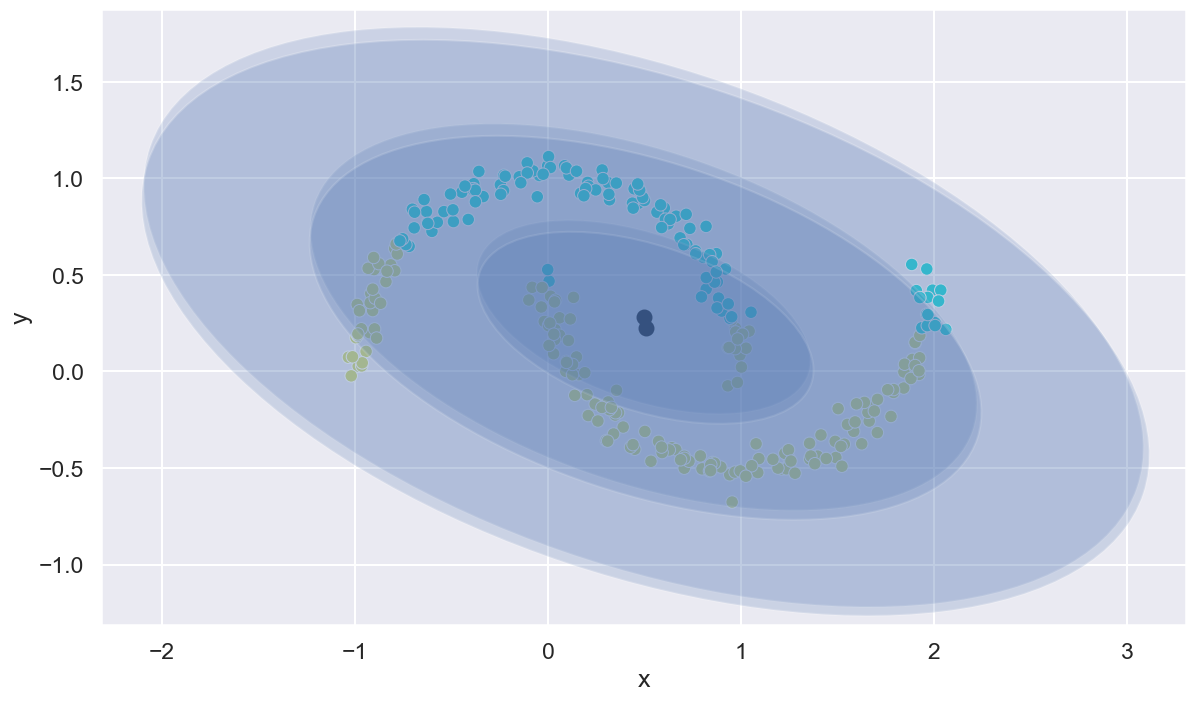

In [19]:
train_and_plot(df_moon, k=2, init_params='random', random_state=42)

### Running with a dataset of 1M records

In [20]:
X, y = make_blobs(n_samples=1000000, centers=7, n_features=2,
                  random_state=33)

df = pd.DataFrame(X, columns=['x', 'y'])

df.head()

x         y
0 -9.507284  7.336711
1 -5.079856 -2.823110
2 -2.155830 -5.106045
3  1.812118 -0.337578
4  8.453084 -5.795128

In [23]:
start = time.time()
model = GaussianMixture(n_components=7, covariance_type='full', random_state=33)
model.fit(df)
print(time.time() - start)
print('Converged?', model.converged_)

1.7142248153686523
Converged? True
